# Balance of plant

In [1]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


### Initialize FPP v1_demount case
[FPP v1 demount case documentation](https://fuse.help/cases.html#FPP)

In [2]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars);
dd = FUSE.init(ini, act; do_plot=false);

[ Info: Equilibrium
[ Info:  Solovev
[ Info: HCD
[ Info:  ECsimple
[ Info:  ICsimple
[ Info:  LHsimple
[ Info:  NBsimple
[ Info: SteadyStateCurrent
[ Info: CXbuild


In [3]:
act

FUSE.ParametersActors{Float64}
├─ ActorBalanceOfPlant
│  ├─ generator_conversion_efficiency ➡ 0.95
│  └─ do_plot ➡ false
├─ ActorBlanket
│  ├─ minimum_first_wall_thickness ➡ 0.02 [m]
│  ├─ blanket_multiplier ➡ 1.2
│  ├─ thermal_power_extraction_efficiency ➡ 1.0
│  └─ verbose ➡ false
├─ ActorCHEASE
│  ├─ free_boundary ➡ true
│  ├─ clear_workdir ➡ true
│  └─ rescale_eq_to_ip ➡ true
├─ ActorCXbuild
│  ├─ rebuild_wall ➡ false
│  └─ do_plot ➡ false
├─ ActorCoreTransport
│  └─ model ➡ :Tauenn
├─ ActorCosting
│  ├─ model ➡ :ARIES
│  ├─ construction_start_year ➡ 2030.0
│  ├─ construction_lead_time ➡ 8.0 [years]
│  ├─ land_space ➡ 1000.0 [acres]
│  ├─ building_volume ➡ 140000.0 [m^3]
│  ├─ interest_rate ➡ 0.05
│  ├─ fixed_charge_rate ➡ 0.078
│  ├─ indirect_cost_rate ➡ 0.4
│  ├─ lifetime ➡ 40 [years]
│  ├─ availability ➡ 0.803
│  ├─ escalation_fraction ➡ 0.05
│  ├─ blanket_lifetime ➡ 6.8 [years]
│  ├─ initial_cost_blanket ➡ 200.0 [millions of dollars]
│  ├─ initial_cost_divertor ➡ 8.0 [millions 

### Run Actors that will be needed for balance of plant

In [4]:
FUSE.ActorNeutronics(dd, act; do_plot=false)
FUSE.ActorDivertors(dd, act)
FUSE.ActorBlanket(dd, act);

[ Info: Neutronics
[ Info: Divertors
[ Info: Blanket
[ Info:  CXbuild


### Running the simple brayton cycle
Run the balance of plant actor, with for the simple case of "brayton only", this is a generalized power cycle which does not optimize itself depending on the configuration

[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds


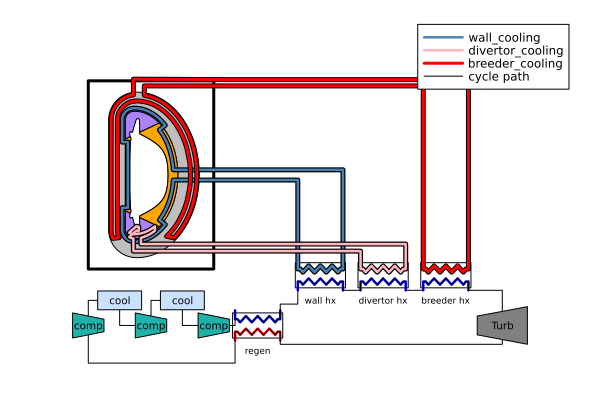

balance_of_plant
├─ Q_plant ➡ [1.60134]
├─ heat_transfer
│  ├─ breeder
│  │  ├─ HX_outlet_temperature ➡ [823.15] [K]
│  │  ├─ circulator_power ➡ [305624] [W]
│  │  ├─ flow_rate ➡ [7883.99] [kg/s]
│  │  ├─ heat_delivered ➡ [6.10375e+08] [W]
│  │  ├─ heat_load ➡ [8.02058e+08] [W]
│  │  ├─ heat_waste ➡ [1.91988e+08] [W]
│  │  ├─ inlet_temperature ➡ [823.213] [K]
│  │  ├─ outlet_temperature ➡ [1373.15] [K]
│  │  └─ working_fluid ➡ "PbLi"
│  ├─ divertor
│  │  ├─ HX_outlet_temperature ➡ [817.935] [K]
│  │  ├─ circulator_power ➡ [2.00789e+07] [W]
│  │  ├─ flow_rate ➡ [343.248] [kg/s]
│  │  ├─ heat_delivered ➡ [2.40767e+08] [W]
│  │  ├─ heat_load ➡ [1.67451e+08] [W]
│  │  ├─ heat_waste ➡ [-5.32371e+07] [W]
│  │  ├─ inlet_temperature ➡ [829.2] [K]
│  │  ├─ outlet_temperature ➡ [923.15] [K]
│  │  └─ working_fluid ➡ "He"
│  └─ wall
│     ├─ HX_outlet_temperature ➡ [671.71] [K]
│     ├─ circulator_power ➡ [1.64893e+07] [W]
│     ├─ flow_rate ➡ [343.248] [kg/s]
│     ├─ heat_delivered ➡ [0] [W]
│  

In [5]:
empty!(dd.balance_of_plant)
act.ActorThermalCycle.power_cycle_type=:brayton_only
FUSE.ActorBalanceOfPlant(dd, act; do_plot=true)
display(IMAS.freeze(dd.balance_of_plant))

### Running the complex_brayton file
[ActorBalanceOfPlant documentation](https://fuse.help/actors.html#BalanceOfPlant)
Run the balance of plant with the model "complex_brayton". This configuration modifies the component order and operating temperatures to minimize the heat waste. For this case, the complex_brayton model has a thermal effeciency of 45%. 
This model relies on high operating temperatures

[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds


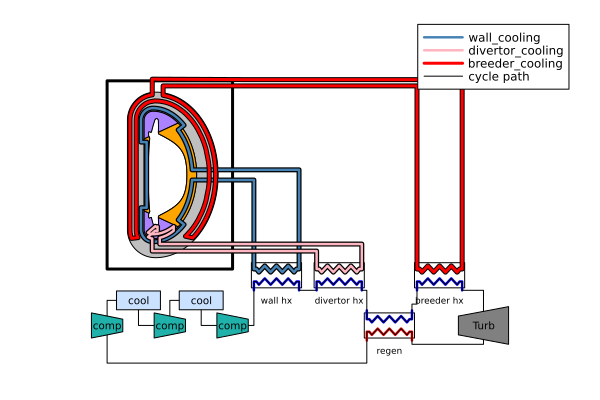

balance_of_plant
├─ Q_plant ➡ [1.54617]
├─ heat_transfer
│  ├─ breeder
│  │  ├─ HX_outlet_temperature ➡ [838.458] [K]
│  │  ├─ circulator_power ➡ [305624] [W]
│  │  ├─ excess_temperature ➡ [69.843] [K]
│  │  ├─ flow_rate ➡ [7883.99] [kg/s]
│  │  ├─ heat_delivered ➡ [7.09497e+08] [W]
│  │  ├─ heat_load ➡ [8.02058e+08] [W]
│  │  ├─ heat_waste ➡ [9.28384e+07] [W]
│  │  ├─ inlet_temperature ➡ [768.678] [K]
│  │  ├─ outlet_temperature ➡ [1373.34] [K]
│  │  └─ working_fluid ➡ "PbLi"
│  ├─ divertor
│  │  ├─ HX_outlet_temperature ➡ [421.109] [K]
│  │  ├─ circulator_power ➡ [1.03375e+07] [W]
│  │  ├─ flow_rate ➡ [343.248] [kg/s]
│  │  ├─ heat_delivered ➡ [1.77789e+08] [W]
│  │  ├─ heat_load ➡ [1.67451e+08] [W]
│  │  ├─ heat_waste ➡ [-5.96046e-08] [W]
│  │  ├─ inlet_temperature ➡ [426.909] [K]
│  │  ├─ outlet_temperature ➡ [520.859] [K]
│  │  └─ working_fluid ➡ "He"
│  └─ wall
│     ├─ HX_outlet_temperature ➡ [368.02] [K]
│     ├─ circulator_power ➡ [9.03426e+06] [W]
│     ├─ flow_rate ➡ [343.24

In [6]:
empty!(dd.balance_of_plant)
act.ActorThermalCycle.power_cycle_type=:complex_brayton
FUSE.ActorBalanceOfPlant(dd, act; do_plot = true);
display(IMAS.freeze(dd.balance_of_plant))

## Power scan for different power cycles

Basic fusion power scan that only runs the ActorBalanceOfPlant, to see what is the break-even point for the different power cycles that we support. This scan knows nothing about the plasma, it only cares about the thermal power that is extracted at the blanket and divertors.

[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfer
[ Info:  ThermalCycle
[ Info:  PowerNeeds
[ Info: BalanceOfPlant
[ Info:  HeatTransfe

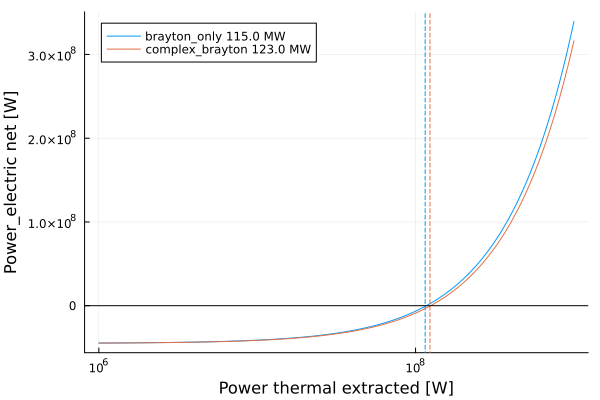

In [7]:
act = FUSE.ParametersActors()
dd = IMAS.dd()

# minimal initialization to run ActorBalanceOfPlant
dd.core_profiles.time = [0.0]
resize!(dd.blanket.module, 1)
resize!(dd.blanket.module[1].time_slice)
dd.blanket.module[1].time_slice[].power_thermal_extracted = 0.0
resize!(dd.divertors.divertor, 1)
@ddtime dd.divertors.divertor[1].power_incident.data = 0.0

# assume 80% on blanket and rest on divertors
blanket_div_ratio = 0.8

# extent of the scan
POW = LinRange(6, 9, 100)

# run and plot
p=plot()
for cycle_type in [:brayton_only, :complex_brayton]#, :rankine_only
    
    Penet = Float64[]
    Ppump = Float64[]
    act.ActorThermalCycle.power_cycle_type=cycle_type
    for pow in POW
        dd.blanket.module[1].time_slice[].power_thermal_extracted = 10^(pow) * blanket_div_ratio
        @ddtime dd.divertors.divertor[1].power_incident.data = 10^(pow) * (1.0 - blanket_div_ratio)
        FUSE.ActorBalanceOfPlant(dd, act)
        push!(Penet, dd.balance_of_plant.power_electric_net[1])
        push!(Ppump, findfirst(:pumping, dd.balance_of_plant.power_electric_plant_operation.system).power[1])
    end

    pow0 = POW[argmin(abs.(Penet))]
    plot!(p, 10.0 .^ POW, Penet, xscale=:log10, label="$cycle_type $(round(10^pow0/1E6)) MW",
        xlabel="Power thermal extracted [W]", ylabel="Power_electric net [W]",legend=:topleft)
    #plot!(p, 10.0 .^ POW, -Ppump, primary=false)
    vline!(p, [10^pow0], label="", primary=false, ls=:dash)
end
hline!(p, [0.0], label="", color=:black)